Das Bundesamt für Statistik stellt eine sehr grosse Anzahl von Datensätzen auf
ihrer Webseite zur Verfügung. Mit Hilfe des Tools `STAT-TAB` ist es relativ einfach,
nach bestimmten Datensätze Ausschau zu halten and spezifische Tabellen herunterzuladen und individuell zusammenzustellen.

a) Besuchen Sie die Webseite
https://www.bfs.admin.ch/bfs/en/home/services/recherche/stat-tab-online-data-search.html
und versuchen Sie, mit dem Datenbrowser zurechtzukommen.
Hinweis: Konsultieren Sie folgendes Hilfsmenu: Guideline for online data search,
welches Sie am Ende der Seite herunterladen können.

b) Die Mehrzahl der Datensätze auf dieser Webseite beinhalten tatsächlich Zeitreihen. Versuchen Sie die Zeitreihe zu finden, welche die Anzahl Elektro-Personenwagen
(PW) von 1990 - 2018 enthält (separat für jeden Kanton). Laden Sie die entsprechende
Tabelle als .csv Datei herunter.

c) Lesen Sie die Datei in Python ein, und definieren Sie eine Zeitreihe für die
Anzahl Elektro-Autos in Luzern. Erstellen Sie eine Graphik der Zeitreihe.
Hinweis: Die Dateien, welche mit Hilfe von `STAT-TAB` generiert werden, enthalten manchmal zusätzliche Informationen neben den regulären Headern mit
den Variablennamen. Schauen Sie sich die .csv Datei in einem Texteditor
an. Finden Sie heraus, wieviele Zeilen dem tatsächlichen Datensatz vorangehen (ausgenommen vom Header). Dann können Sie mit der Python-Funktion
`pd.read_csv()` die Daten einlesen, wobei Sie mit Hilfe des Parameters `skiprows=k`
die ersten k Zeilen überspringen können:

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

pw_electric = pd.read_csv('e-vehicles.csv', sep=',', skiprows=2, header=0, encoding="utf-8", index_col=0)
pw_electric.head()

,Type of vehicle,Motor fuel,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Canton,,,,,,,,,,,,,,,,,,,,,
Zürich,FAZG 1: Passenger cars,Electricity,64,120,161,153,153,150,139,131,...,42,150,211,428,737,1201,2201,2855,3743,5003
Bern / Berne,FAZG 1: Passenger cars,Electricity,75,130,132,134,113,113,108,101,...,42,46,108,177,269,428,682,971,1343,1758
Luzern,FAZG 1: Passenger cars,Electricity,12,21,25,24,23,20,21,18,...,3,10,38,79,118,196,350,530,719,884
Uri,FAZG 1: Passenger cars,Electricity,0,0,0,0,0,0,0,0,...,1,1,2,4,5,10,12,22,29,41
Schwyz,FAZG 1: Passenger cars,Electricity,1,5,7,8,9,10,11,11,...,2,7,15,37,54,112,195,292,387,520


In [15]:
pw_electric_luzern = DataFrame(pw_electric.loc["Luzern"][2:])
pw_electric_luzern

,Luzern
1990,12
1991,21
1992,25
1993,24
1994,23
1995,20
1996,21
1997,18
1998,14
1999,12


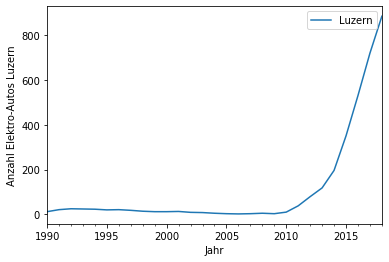

In [11]:
pw_electric_luzern["Year"] = pd.to_datetime(pw_electric_luzern.index)
pw_electric_luzern.set_index("Year", inplace=True)
pw_electric_luzern.plot()
plt.xlabel("Jahr")
plt.ylabel("Anzahl Elektro-Autos Luzern")
plt.show()

d) Wiederholen Sie die Vorgehensweise aus Teilaufgabe (c) für den Kanton Zürich.

In [21]:
pw_electric_zurich = DataFrame(pw_electric.loc["Zürich"][2:])
pw_electric_zurich

,Zürich
1990,64
1991,120
1992,161
1993,153
1994,153
1995,150
1996,139
1997,131
1998,121
1999,106


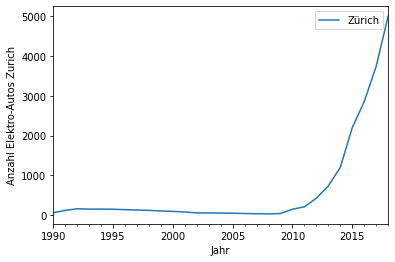

In [22]:
pw_electric_zurich["Year"] = pd.to_datetime(pw_electric_zurich.index)
pw_electric_zurich.set_index("Year", inplace=True)
pw_electric_zurich.plot()
plt.xlabel("Jahr")
plt.ylabel("Anzahl Elektro-Autos Zurich")
plt.show()

e) Wie können Sie die Daten zwischen den Kantonen Luzern und Zürich korrekt
miteinander vergleichen?

Man kann die Prozentzahl der elektroautos miteinander vergleichen, die absoluten Werte sind nicht aussagekraeftig, da in Luzern und Zurich unterschiedlich viele Autos fahren.

Man kann auch das Wachstum der E-Autos von beiden Kantonen miteinander vergleichen. Man vergleicht somit das relative wachstum $log(X_i) - log(X_{i-1})$.

In [53]:
relatives_wachstum_zurich  = (
    np.log(pw_electric_zurich.astype('float')) - 
    np.log(pw_electric_zurich.shift(1).astype('float'))
)

relatives_wachstum_zurich = (
    np.log(pw_electric_luzern.astype('float')) - 
    np.log(pw_electric_luzern.shift(1).astype('float'))
)

relatives_wachstum = pd.concat([relatives_wachstum_luzern, relatives_wachstum_zurich], axis=1, sort=False)

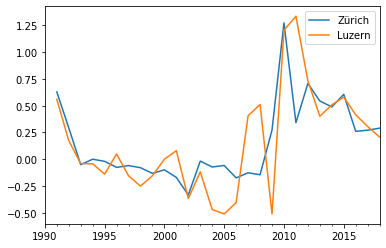

In [54]:
relatives_wachstum.plot()